<a href="https://colab.research.google.com/github/youmjisun/gachon_3-2/blob/main/3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

시험!!
k-최근접 이웃 회귀 알고리즘을 이용하여 데이터세트를 훈련한 모델을 만들고 농어의 길이가 50일때 무게를 예측해라

In [7]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

print(knr.predict([[50]]))

[1033.33333333]


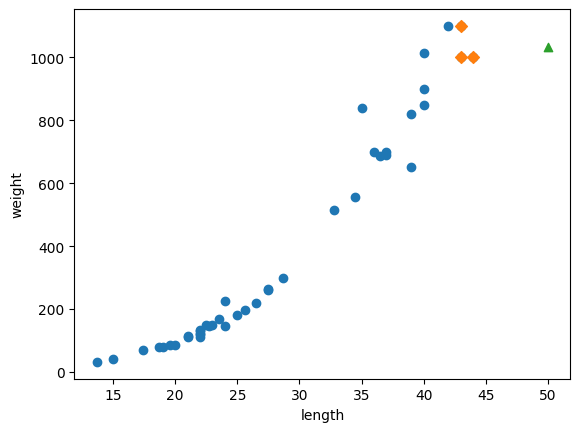

In [8]:
import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

길이가 길어질수록 농어의 무게 증가
그러나 이 모델으 k최근접 이웃 회귀 알고리즘을 이용하기 때문에 50에서 가장 가까운 3개의 샘플들의 타깃

In [10]:
print(np.mean(train_target[indexes]))
print(knr.predict([[100]]))

1033.3333333333333
[1033.33333333]


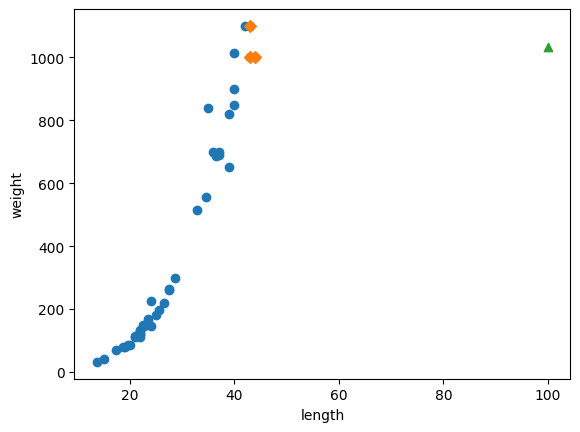

In [11]:
#100cm 농어의 이웃 구하기
distances, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

##선형회귀
특성이 하나인 경우 그 특성을 가장 잘 나타낼 수 있는

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)

print(lr.predict([[50]]))

[1241.83860323]


In [14]:
print(lr.coef_, lr.intercept_)

#기울기가 39, 절편이 -709

[39.01714496] -709.0186449535477


In [26]:
#기울기와 절편 계산하기
x_bar = train_input.mean()
y_bar = train_target.mean()

a = ((train_input - x_bar).reshape(-1,)*(train_target - y_bar)).sum() / ((train_input - x_bar)**2).sum()
print(a.reshape(-1))

b = y_bar - a * x_bar
print(b)

[39.01714496]
-709.0186449535477


##모델파라미터(중요)
coef_(기울기)와 intercept_(절편) 같이 머신러닝 알고리즘이 찾은 값

##모델 기반 학습
머신러닝 알고리즘의 훈련 과정이 최적의 모델 파라미터를 찾는 것
예) 선형회귀

##사례 기반 학습


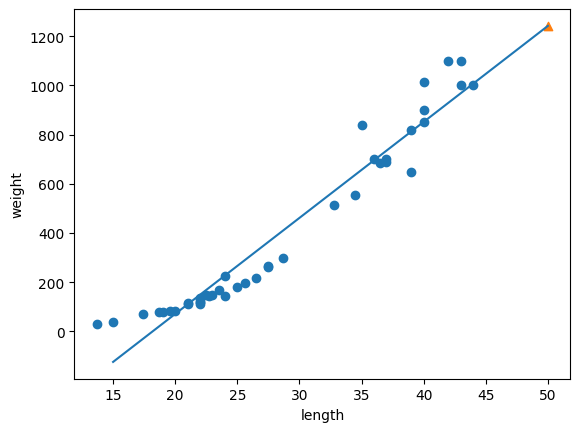

In [16]:
#선형회귀가 학습한 직선 그리기
plt.scatter(train_input, train_target)
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [17]:
#R^2 점수 확인
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

#훈련세트 > 테스트세트 but 과대적합 X => 둘 다 낮아서 과소 적

0.939846333997604
0.8247503123313558


In [18]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

print(train_input.shape, test_input.shape)
print(train_poly.shape, test_poly.shape)


(42, 1) (14, 1)
(42, 2) (14, 2)


In [20]:
lrp = LinearRegression()
lrp.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [21]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


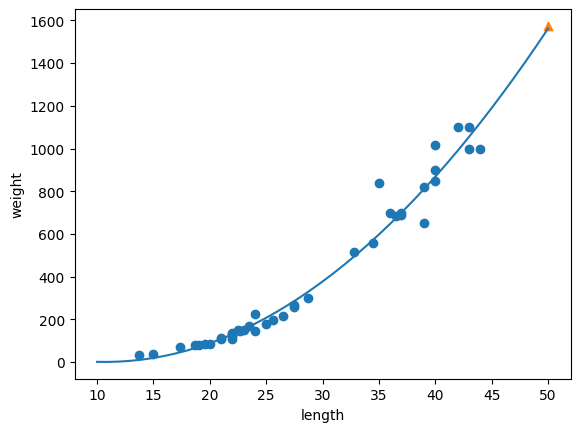

In [22]:
point = np.arange(10, 51)
plt.scatter(train_input, train_target)
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)
plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [24]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

#과소적합 => 더 복잡한 모델 필요

0.9706807451768623
0.9775935108325122
